In [ ]:
import ann
import imp
imp.reload(ann)

batch: batches= 500
batch: X.shape= (50000, 784, 1)
batch: LAB.shape= (50000, 1, 1)
batch: X.shape= (500, 100, 784, 1)
batch: LAB.shape= (500, 100, 1, 1)
iteration number=:%s/%s 0.0
iteration number=:%s/%s 0.002
iteration number=:%s/%s 0.004
iteration number=:%s/%s 0.006
iteration number=:%s/%s 0.008
iteration number=:%s/%s 0.01
iteration number=:%s/%s 0.012
iteration number=:%s/%s 0.014
iteration number=:%s/%s 0.016
iteration number=:%s/%s 0.018
iteration number=:%s/%s 0.02
iteration number=:%s/%s 0.022
iteration number=:%s/%s 0.024
iteration number=:%s/%s 0.026
iteration number=:%s/%s 0.028
iteration number=:%s/%s 0.03
iteration number=:%s/%s 0.032
iteration number=:%s/%s 0.034
iteration number=:%s/%s 0.036
iteration number=:%s/%s 0.038
iteration number=:%s/%s 0.04
iteration number=:%s/%s 0.042
iteration number=:%s/%s 0.044
iteration number=:%s/%s 0.046
iteration number=:%s/%s 0.048
iteration number=:%s/%s 0.05
iteration number=:%s/%s 0.052
iteration number=:%s/%s 0.054
iteration num

iteration number=:%s/%s 0.56
iteration number=:%s/%s 0.562
iteration number=:%s/%s 0.564
iteration number=:%s/%s 0.566
iteration number=:%s/%s 0.568
iteration number=:%s/%s 0.57
iteration number=:%s/%s 0.572
iteration number=:%s/%s 0.574
iteration number=:%s/%s 0.576
iteration number=:%s/%s 0.578
iteration number=:%s/%s 0.58
iteration number=:%s/%s 0.582
iteration number=:%s/%s 0.584
iteration number=:%s/%s 0.586
iteration number=:%s/%s 0.588
iteration number=:%s/%s 0.59
iteration number=:%s/%s 0.592
iteration number=:%s/%s 0.594
iteration number=:%s/%s 0.596
iteration number=:%s/%s 0.598
iteration number=:%s/%s 0.6
iteration number=:%s/%s 0.602
iteration number=:%s/%s 0.604
iteration number=:%s/%s 0.606
iteration number=:%s/%s 0.608
iteration number=:%s/%s 0.61
iteration number=:%s/%s 0.612
iteration number=:%s/%s 0.614
iteration number=:%s/%s 0.616
iteration number=:%s/%s 0.618
iteration number=:%s/%s 0.62
iteration number=:%s/%s 0.622
iteration number=:%s/%s 0.624
iteration number=:

Real lab number is :	4
Precdict number is :	4


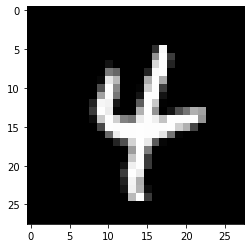

In [63]:
ann.show()